<a href="https://colab.research.google.com/github/0xmennatullah/PyTorch/blob/main/ch3_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch03: Computer Vision

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(f"torch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

torch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


## 1. getting dataset

### 1.0 getting thimgs ready

In [2]:
train_data = datasets.FashionMNIST(
    root = "data",
    train =True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train =False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.75MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.6MB/s]


In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 IO shapes

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.targets), len(test_data.data)

(60000, 60000, 10000, 10000)

In [6]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 visualizing

Text(0.5, 1.0, '9')

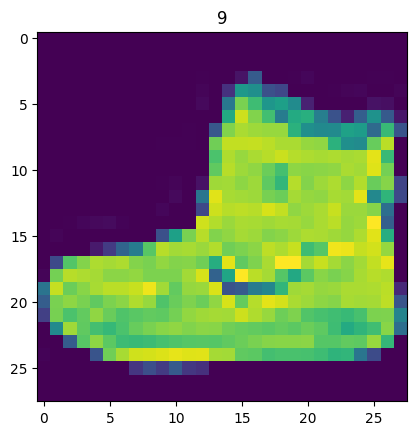

In [7]:
image, lable = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

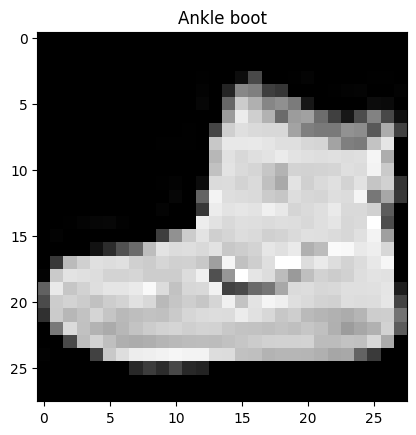

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])

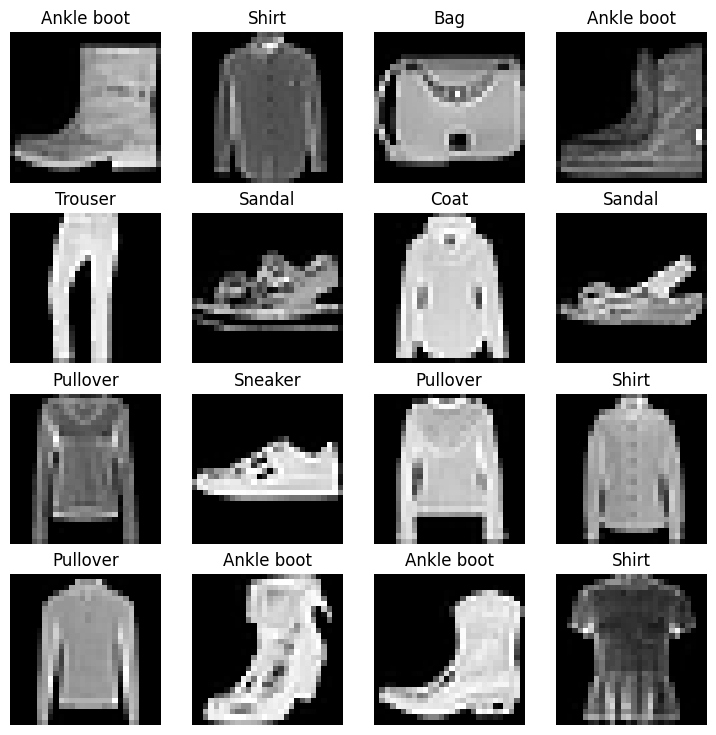

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data),  size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)


## 2. data loaders

In [10]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"data loaders: {len(train_dataloader),len( test_dataloader)}")

data loaders: (1875, 313)


In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


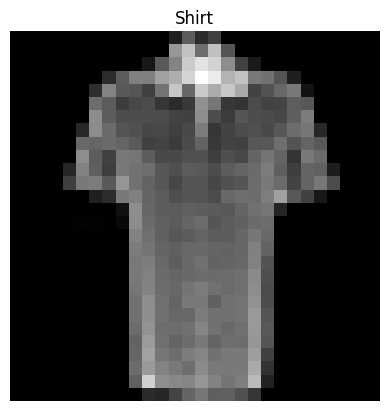

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: baseline

In [13]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
print(f"shape b4 flatting: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape b4 flatting: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [14]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [15]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_name))
model_0.to("cpu")


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 loss, optimizer, eval matrices

In [16]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("exist")

else:
  print("downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

downloading


In [17]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr =0.1)

### 3.2 timing

### 3.3 trainning loop batches

In [18]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n----------")

  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400 ==0:
                  print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  test_loss, test_acc= 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc = accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /=len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 0.28%

epoch: 1
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 0.30%

epoch: 2
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 0.30%



In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)


# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.44395 | Test loss: 0.46506, Test acc: 83.65%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.43662 | Test loss: 0.46453, Test acc: 83.89%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.43045 | Test loss: 0.46594, Test acc: 83.93%



## 4. predictions

In [20]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc =0,0
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_res = eval_model(model = model_0,
                         data_loader = test_dataloader,
                         loss_fn= loss_fn, accuracy_fn=accuracy_fn)
model_0_res

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4659360349178314,
 'model_acc': 83.92571884984025}

## 5. device agnostic-code

In [21]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. non-linear model

In [22]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)


In [23]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 loss, optim, eval

In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 trainning, testing loops

In [25]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train loss: {train_loss:.5f}, train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc+= accuracy_fn(y_true=y,
                             y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test loss: {test_loss:.5f} | test accuracy: {test_acc:.2f}%\n")



In [26]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epochs: {epoch}\n----------")
  train_step(data_loader = train_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)

  test_step(data_loader = test_dataloader,
            model = model_1,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

epochs: 0
----------
train loss: 1.09199, train accuracy: 61.34%
test loss: 0.95636 | test accuracy: 65.00%

epochs: 1
----------
train loss: 0.78101, train accuracy: 71.93%
test loss: 0.72227 | test accuracy: 73.91%

epochs: 2
----------
train loss: 0.67027, train accuracy: 75.94%
test loss: 0.68500 | test accuracy: 75.02%



In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device
               ):
  loss, acc =0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # Fix: Pass the predicted labels to accuracy_fn
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

model_1_res = eval_model(model=model_1, data_loader=test_dataloader,
                         loss_fn = loss_fn, accuracy_fn = accuracy_fn,
                         device = device)
model_1_res

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## 7. CNN

In [30]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_name)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 nn.Conv2d()

In [31]:
torch.manual_seed(42)
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

print(f"batch size: {images.shape}")
print(f"single image shape: {test_image.shape}")

batch size: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])


In [32]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_layer(test_image)

tensor([[[ 0.6552,  0.5381,  0.4456,  ...,  0.3679,  0.1734,  0.2343],
         [ 0.4011,  0.2772,  0.4309,  ...,  0.0474,  0.3547,  0.4406],
         [ 0.5072,  0.6963,  0.3967,  ...,  0.5034,  0.3260,  0.4359],
         ...,
         [ 0.3767,  0.4173,  0.7551,  ...,  0.5548,  0.5815,  0.2547],
         [ 0.4143,  0.6770,  0.5922,  ...,  0.7285,  0.3320,  0.5752],
         [ 0.1725,  0.3980,  0.5999,  ...,  0.4316,  0.5133,  0.3385]],

        [[ 0.0954, -0.0688, -0.1089,  ...,  0.0185, -0.4996, -0.0184],
         [-0.0188, -0.1703, -0.1344,  ..., -0.2991, -0.0339,  0.1632],
         [-0.1585, -0.0837, -0.0159,  ...,  0.0026,  0.1540, -0.1372],
         ...,
         [-0.0297, -0.0980, -0.0731,  ...,  0.0623, -0.1080, -0.0946],
         [-0.1508, -0.1934,  0.2011,  ...,  0.0415, -0.0989,  0.2556],
         [ 0.0447,  0.1020, -0.1685,  ...,  0.0908, -0.0682, -0.2266]],

        [[ 0.0098,  0.1790,  0.3092,  ...,  0.2502,  0.2292, -0.0542],
         [-0.0979,  0.1598,  0.1165,  ..., -0

In [33]:
test_image.unsqueeze(dim=0) #cuz conv layer work on 4d tensor(batch, color, h,w) => unsqueezing adds this 4th dim

tensor([[[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
          [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
          [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
          ...,
          [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
          [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
          [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

         [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
          [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
          [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
          ...,
          [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
          [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
          [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

         [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
          [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
          [0.7021, 0.5967, 0.7744,  ..., 0

In [34]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [35]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size =(5,5),
                         padding=0
                         )
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 60, 60])

### 7.2 nn.MaxPool2d

In [37]:
print(f"test image original shape: {test_image.shape}")
print(f"unsqueezed test image: {test_image.unsqueeze(dim=0).shape}")

test image original shape: torch.Size([3, 64, 64])
unsqueezed test image: torch.Size([1, 3, 64, 64])


In [38]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"dim after conv layer: {test_image_through_conv.shape}")

dim after conv layer: torch.Size([1, 10, 62, 62])


In [40]:
img_thro_max_n_conv = max_pool_layer(test_image_through_conv)
print(f"dim after conv & max layer: {img_thro_max_n_conv.shape}")

dim after conv & max layer: torch.Size([1, 10, 31, 31])


### 7.3 loss and optim fn

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 trainning & testing

In [42]:
torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader = train_dataloader,
             model = model_2,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             optimizer = optimizer,
             device = device)
  test_step(data_loader = test_dataloader,
            model = model_2,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
train loss: 0.59334, train accuracy: 78.34%
test loss: 0.39600 | test accuracy: 85.75%

Epoch: 1
---------
train loss: 0.36271, train accuracy: 86.87%
test loss: 0.34710 | test accuracy: 87.15%

Epoch: 2
---------
train loss: 0.32473, train accuracy: 88.17%
test loss: 0.32393 | test accuracy: 88.20%



In [43]:
model_2_res = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_2_res

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32392796874046326,
 'model_acc': 88.19888178913737}

## 8. comparison of models

In [44]:
import pandas as pd
compare = pd.DataFrame([model_0_res, model_1_res, model_2_res])
compare

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.465936,83.925719
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.323928,88.198882


Text(0, 0.5, 'model')

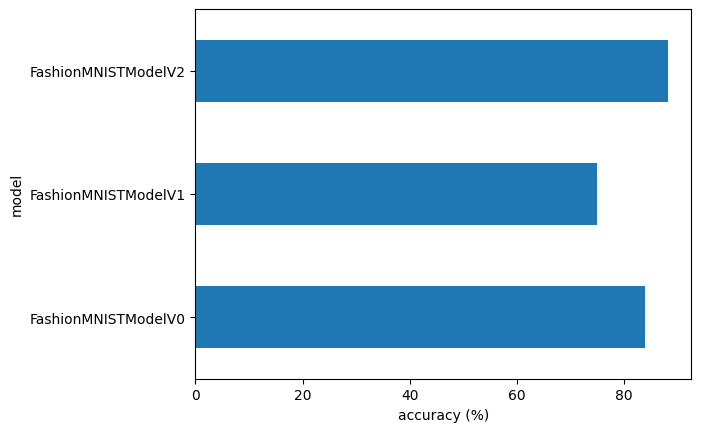

In [45]:
compare.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. eval random predictions

In [51]:
def make_predictions(model: torch.nn.Module, data: list, device:  torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),
                                dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs).cpu()

In [49]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [52]:
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
pred_probs[:2]

tensor([[7.1807e-08, 1.0645e-08, 3.5584e-08, 5.2539e-07, 1.3532e-08, 9.9991e-01,
         5.2341e-07, 2.3557e-05, 8.1721e-06, 5.9623e-05],
        [4.7211e-02, 7.7652e-01, 1.6560e-03, 9.1935e-02, 2.8152e-02, 1.0284e-04,
         5.2896e-02, 4.5997e-04, 9.4421e-04, 1.2675e-04]])

In [53]:
pred_class = pred_probs.argmax(dim=1)
pred_class

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

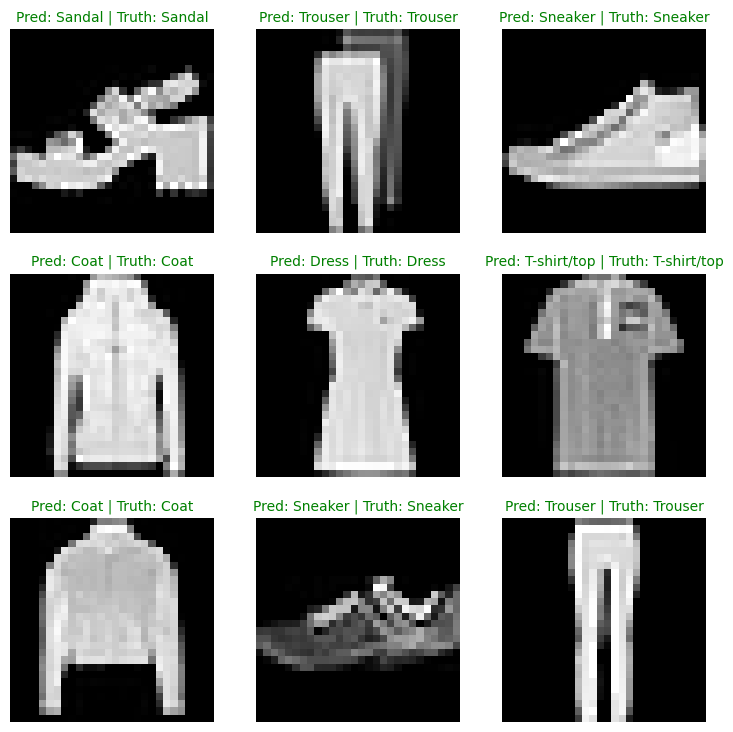

In [57]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_class[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 10. confusion matrix

In [59]:
from tqdm.auto import tqdm
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="making predictions"):
    X,y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tens = torch.cat(y_preds)

making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [60]:
try:
  import torchmetric, mlxtend
  print(f"mlxtend ver: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>= 19, "mlxtend verison should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend ver: {mlxtend.__version__}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
mlxtend ver: 0.23.4


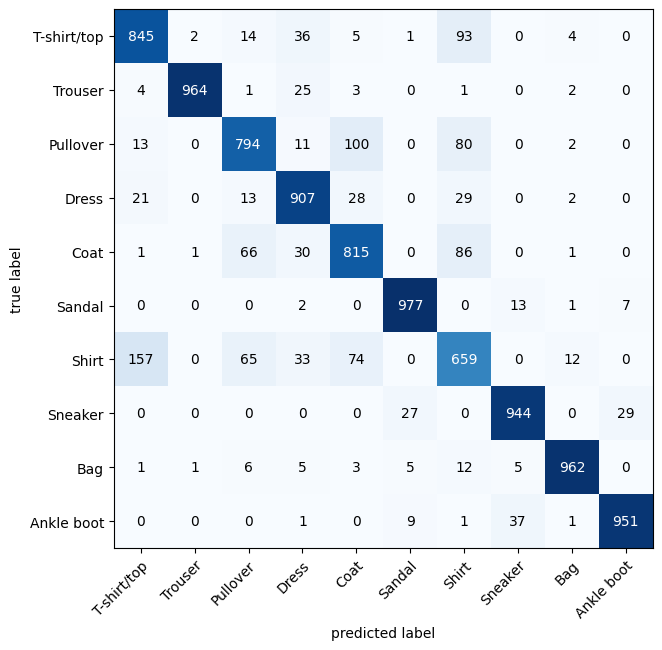

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_name), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tens,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_name,
    figsize=(10,7)
)

## 11 save n load

In [64]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "ava_V3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


In [65]:
loaded_model2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=10)
loaded_model2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model2 = loaded_model2.to(device)
torch.manual_seed(42)
loaded_model2 = eval_model(
    model = loaded_model2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model2

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32392796874046326,
 'model_acc': 88.19888178913737}